<a href="https://colab.research.google.com/github/GregoryDzej/Big-Data-Python-task/blob/secondbranch/Big_data_Cardio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()



for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))



import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import os



# Importing dataset



main_data = pd.read_csv (r'/content/cardio_train.csv', delimiter=';', encoding = "ISO-8859-1")



main_data

KeyboardInterrupt: ignored

After loading the "cardio.csv" data, it seems that the potential candidate to be a dependent variables is a dichotomus variable labeled as "cardio". 
It has values 0 and 1, where 0 represents not having a cardiovasculer disease by a patient and 1 stands for having the disease.
First step for before conducting the analysis is to describe the data, find missing values and observiations that seems to be inappropriate for the analysis, thus potentially to ommit. Data set contains 13 variables, from which  "age", "height","weight","ap_hi","ap_lo" are a quantitaqtive - continous variables, whereas the variables like: "gender", "smoke","alco" - are representing dichotomus variables and "cholesterol", "gluc" representing ordered categorical variables with three levels.   

In [17]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68699.0,49969.859940,28846.891902,0.00,24993.50,50008.00,74868.50,99999.00
age,68699.0,19464.045532,2468.186192,10798.00,17657.00,19701.00,21324.00,23713.00
gender,68699.0,1.348695,0.476561,1.00,1.00,1.00,2.00,2.00
height,68699.0,164.393863,7.996745,76.00,159.00,165.00,170.00,250.00
weight,68699.0,74.107002,14.296139,11.00,65.00,72.00,82.00,200.00
ap_hi,68699.0,126.571275,16.619176,60.00,120.00,120.00,140.00,210.00
ap_lo,68699.0,81.327603,9.509558,30.00,80.00,80.00,90.00,140.00
cholesterol,68699.0,1.364445,0.678762,1.00,1.00,1.00,1.00,3.00
gluc,68699.0,1.225840,0.571799,1.00,1.00,1.00,1.00,3.00
smoke,68699.0,0.088022,0.283328,0.00,0.00,0.00,0.00,1.00


In [18]:
#checking the number of NA's in the dataset 
main_data.isna().sum()

id                    0
age                   0
gender                0
height                0
weight                0
ap_hi                 0
ap_lo                 0
cholesterol           0
gluc                  0
smoke                 0
alco                  0
active                0
cardio                0
age_y                 0
bmi                   0
bmi_high              0
gender_dummy          0
ap_hi_norm            0
ap_hi_at_risk         0
ap_hi_hypertension    0
ap_lo_norm            0
ap_lo_at_risk         0
ap_lo_hypertension    0
dtype: int64

In [19]:
#frequency of dichotomus variable
main_data[["gender","cholesterol","gluc","smoke","alco","cardio" ]].apply(lambda x: x.value_counts()).T.stack()

gender       1    44744.0
             2    23955.0
cholesterol  1    51531.0
             2     9299.0
             3     7869.0
gluc         1    58409.0
             2     5065.0
             3     5225.0
smoke        0    62652.0
             1     6047.0
alco         0    65021.0
             1     3678.0
cardio       0    34716.0
             1    33983.0
dtype: float64

After describing the data oit can be observed that there is 0 NA's within the data set. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71b8044310>,
      dtype=object)

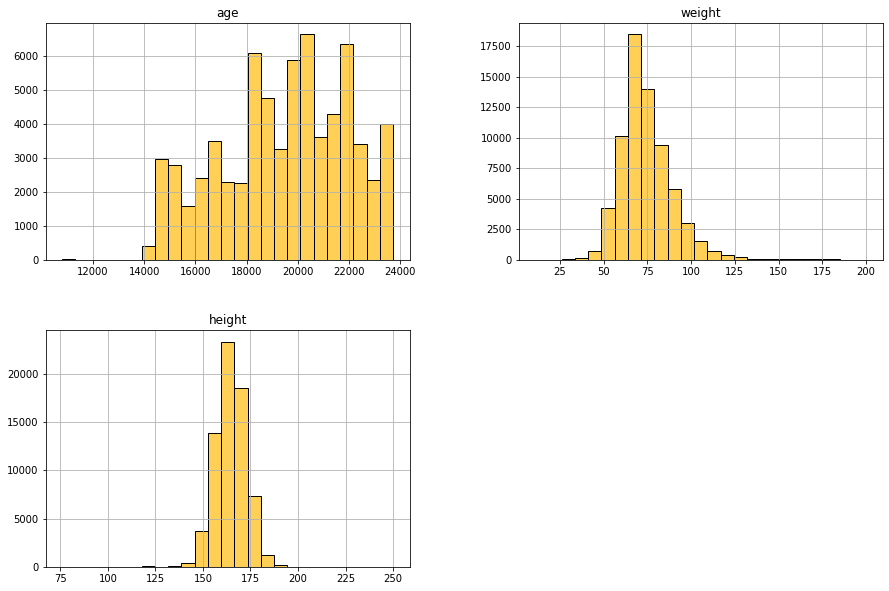

In [20]:
main_data.hist(column=['age','weight','height'],bins=25, figsize=(15, 10), color='#FFCF56', edgecolor='black')

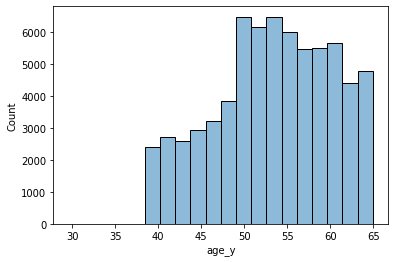

In [21]:
##########  transformation of data #######################
# convert age from days to years
main_data['age_y'] = (main_data['age']/365).round(decimals=2)
sns.histplot(data=main_data,x='age_y',bins=20,palette="dark:darkred", alpha=0.5)

,bmi_high
0,50688
1,18011


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1,1,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0,0,0,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1,0,0,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0,1,0,0,1,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0,0,0,1,0,0,1,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1,0,0,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0,1,0,1,0,0,0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0,0,1,0,0,1,0,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0,0,1,0,0,1,0,0


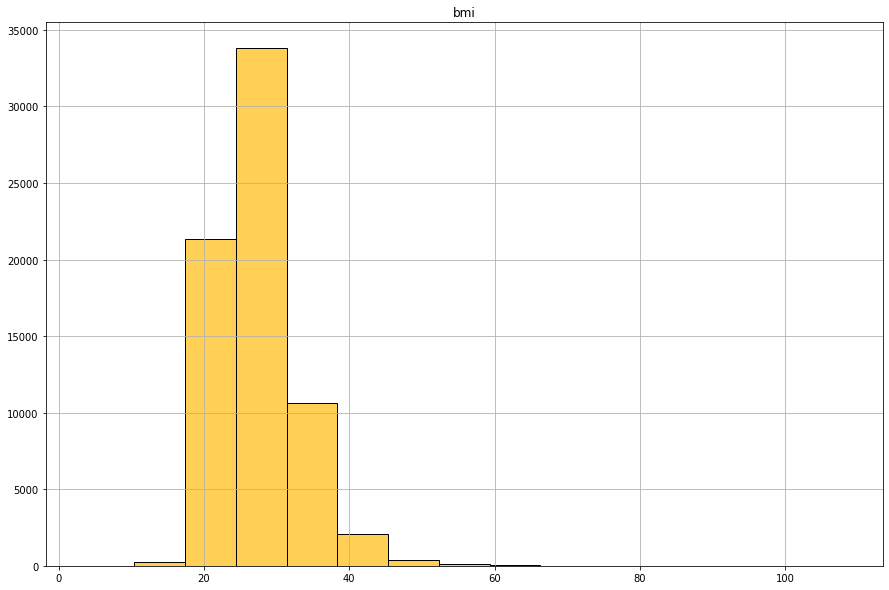

In [22]:
#convert heigh and weight to BMI categories 
main_data['bmi'] = (main_data['weight'] / (((main_data['height']/100)**2))).round(decimals=2)
#creating the treshold 0 -> 1 
main_data['bmi_high'] = (main_data['bmi'] >= 30).astype(int)
main_data.hist(column=['bmi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')
main_data['bmi_high']

display(pd.DataFrame(main_data['bmi_high'].value_counts()))

main_data.head(10)

In [23]:
#converting gender from 1 and 2 to 0 and 1 value 
main_data['gender_dummy'] = main_data['gender'] - 1
main_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1,1,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0,0,0,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1,0,0,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0,1,0,0,1,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0,0,0,1,0,0,1,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1,0,0,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0,1,0,1,0,0,0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0,0,1,0,0,1,0,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0,0,1,0,0,1,0,0


In [24]:
############## DATA CLEANING ###################
# deleting the BMI that are bigger than 120

main_data["bmi"].describe().T
drop_criteria_bmi = main_data[main_data['bmi'] > 120].index

# number of records to be removed
print(drop_criteria_bmi.size)
# remove records
main_data.drop(drop_criteria_bmi, inplace = True)

0


In [25]:
#adjust the Blood pressure levels 
# ap_hi is higher than 250 or lower than 60
drop_criteria_aphi = main_data[(main_data['ap_hi'] > 210) | (main_data['ap_hi'] < 60)].index

# ap_lo is higher than 200 or lower than 10
drop_criteria_aplo = main_data[(main_data['ap_lo'] > 140) | (main_data['ap_lo'] < 30)].index

# ap_lo is higher than 'ap_hi
drop_criteria_ap = main_data[main_data['ap_lo'] > main_data['ap_hi']].index 

# number of records to be removed
drop_criteria = drop_criteria_aphi.union(drop_criteria_aplo)
drop_criteria.union(drop_criteria_ap)
print(drop_criteria.size)
1276
# remove the records
main_data.drop(drop_criteria, inplace = True)

#blood preasure levels set up acc. to The Seventh Report of the Joint National Committee on Prevention, Detection, Evaluation, and Treatment of High Blood Pressure (2003 Guideline)2
#creating the treshold 0 -> 1 for ap_hi

main_data['ap_hi_norm'] = (main_data['ap_hi'] < 120).astype(int)
main_data['ap_hi_at_risk'] = ((main_data['ap_hi'] >= 120) & (main_data['ap_hi'] <=139)).astype(int)
main_data['ap_hi_hypertension']= (main_data['ap_hi'] >=140).astype(int)

#creating the treshold 0 -> 1 for ap_lo 

main_data['ap_lo_norm'] = (main_data['ap_lo'] < 80).astype(int)
main_data['ap_lo_at_risk'] = ((main_data['ap_lo'] >= 80) & (main_data['ap_lo'] <=89)).astype(int)
main_data['ap_lo_hypertension']= (main_data['ap_lo'] >=90).astype(int)

main_data

0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1,1,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0,0,0,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1,0,0,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93,0,1,0,1,0,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47,1,0,0,0,1,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35,1,1,0,0,1,0,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10,0,0,0,1,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71b7d45f50>]],
      dtype=object)

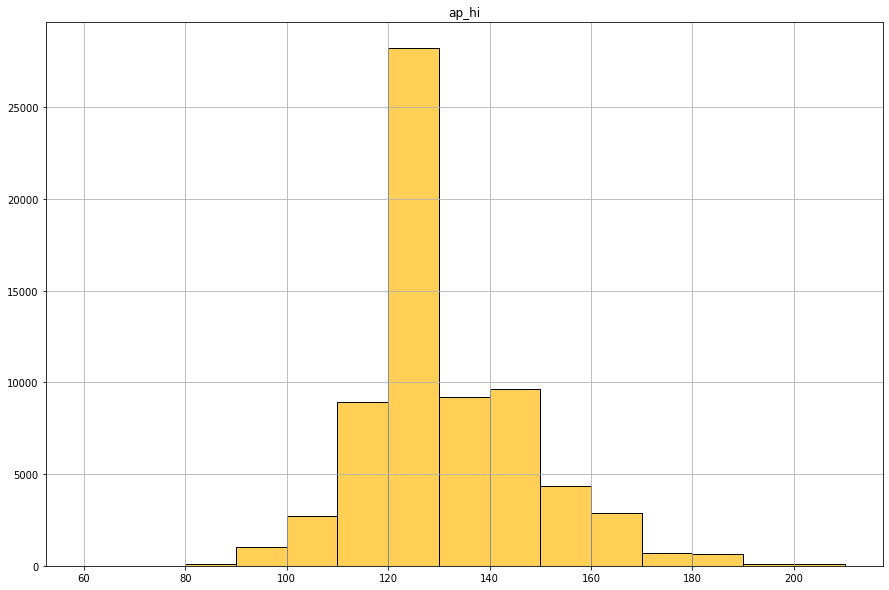

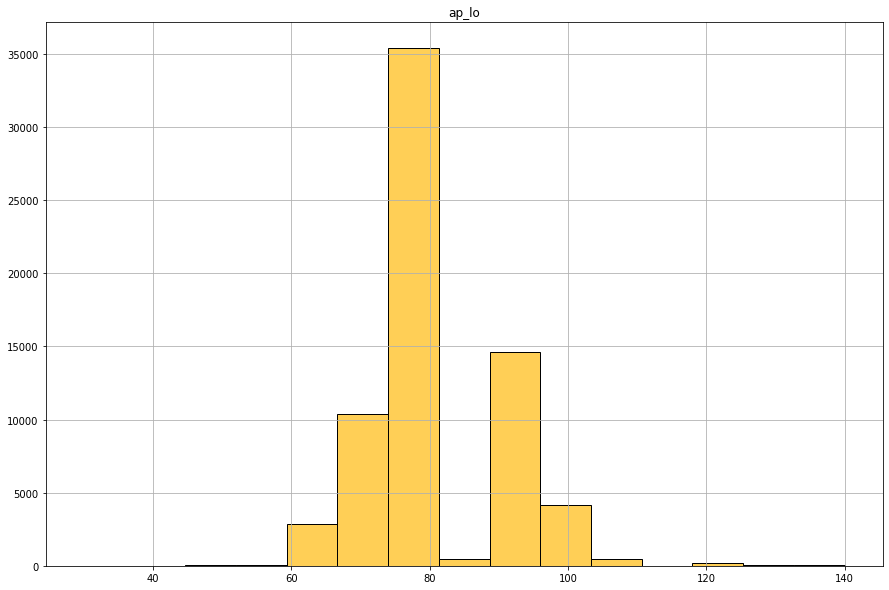

In [26]:
main_data.hist(column=['ap_hi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')
main_data.hist(column=['ap_lo'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')

In [27]:
display(main_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,68699.0,49969.859940,28846.891902,0.00,24993.50,50008.00,74868.50,99999.00
age,68699.0,19464.045532,2468.186192,10798.00,17657.00,19701.00,21324.00,23713.00
gender,68699.0,1.348695,0.476561,1.00,1.00,1.00,2.00,2.00
height,68699.0,164.393863,7.996745,76.00,159.00,165.00,170.00,250.00
weight,68699.0,74.107002,14.296139,11.00,65.00,72.00,82.00,200.00
ap_hi,68699.0,126.571275,16.619176,60.00,120.00,120.00,140.00,210.00
ap_lo,68699.0,81.327603,9.509558,30.00,80.00,80.00,90.00,140.00
cholesterol,68699.0,1.364445,0.678762,1.00,1.00,1.00,1.00,3.00
gluc,68699.0,1.225840,0.571799,1.00,1.00,1.00,1.00,3.00
smoke,68699.0,0.088022,0.283328,0.00,0.00,0.00,0.00,1.00


In [28]:
# distribution of response variable
display(pd.DataFrame(main_data['cardio'].value_counts()))

,cardio
0,34716
1,33983


########################   DATA VISUALISATION  ###################################
# Here is a visualisation of both of the categorical and and continous variables from the cleaned dataset. 

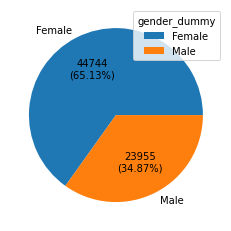

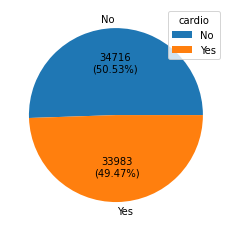

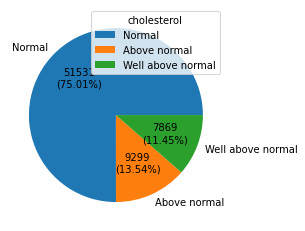

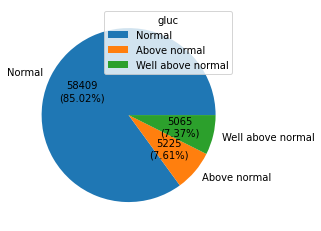

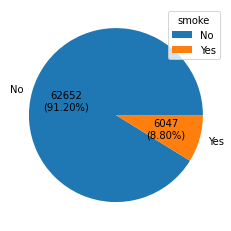

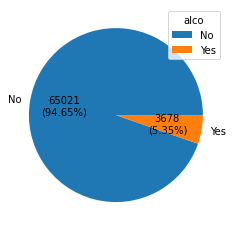

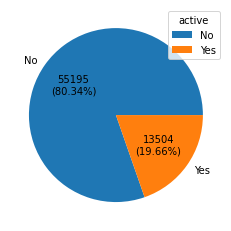

In [29]:
def pie_chart(main_data, col, labels):
    data = main_data[col].value_counts().to_numpy()
    def absolute_value(val):
        a  = np.round(val / 100 * data.sum(), 0)
        return str('%0.0f' % a) + '\n(' + ('%0.2f' % val) + '%)'
    plt.pie(data, labels = labels, autopct=absolute_value)
    plt.legend(title=col)
    plt.show() 

pie_chart(main_data, 'gender_dummy', ['Female', 'Male'])
pie_chart(main_data, 'cardio', ['No', 'Yes'])
pie_chart(main_data, 'cholesterol', ['Normal', 'Above normal', 'Well above normal'])
pie_chart(main_data, 'gluc', ['Normal', 'Above normal', 'Well above normal'])
pie_chart(main_data, 'smoke', ['No', 'Yes'])
pie_chart(main_data, 'alco', ['No', 'Yes'])
pie_chart(main_data, 'active', ['No', 'Yes'])

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

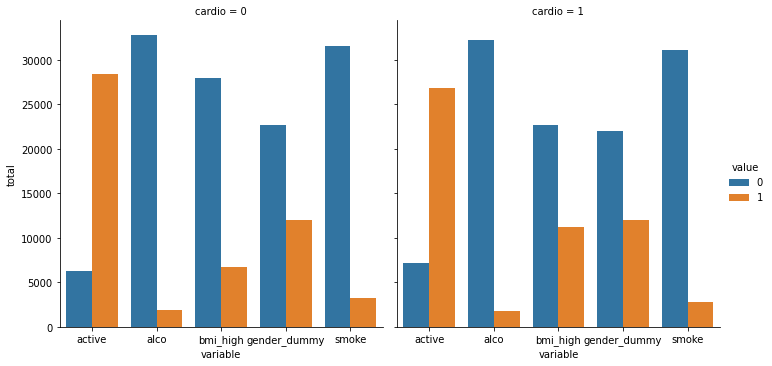

In [30]:
# Draw Categorical Plot of Dichotomus Variables
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = [ 'smoke', 'alco', 'active', 'gender_dummy','bmi_high'],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(20,30))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot1.png')
    return fig

draw_cat_plot()

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

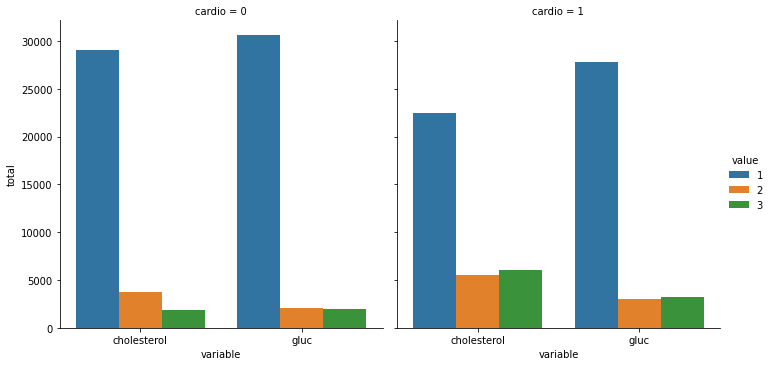

In [31]:
# Draw the plot of Categorical variables
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = ['cholesterol', 'gluc'],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(20,30))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot2.png')
    return fig

draw_cat_plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71b8044c50>,
      dtype=object)

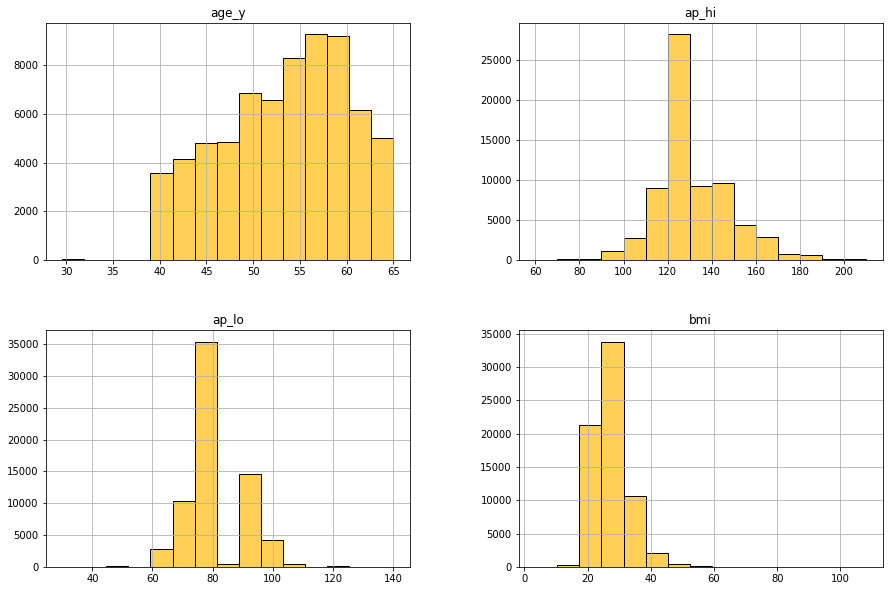

In [32]:
# Plot the Contionus Variables 

main_data.hist(column=['age_y','ap_hi','ap_lo','bmi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')


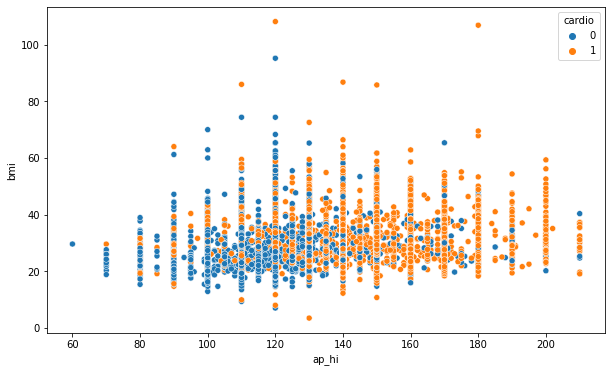

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='bmi', data= main_data, hue='cardio')

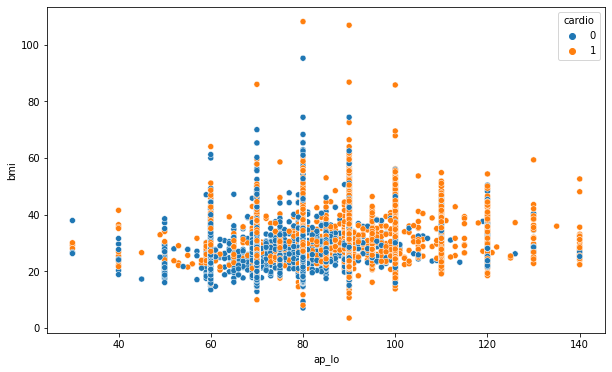

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_lo', y='bmi', data= main_data, hue='cardio')

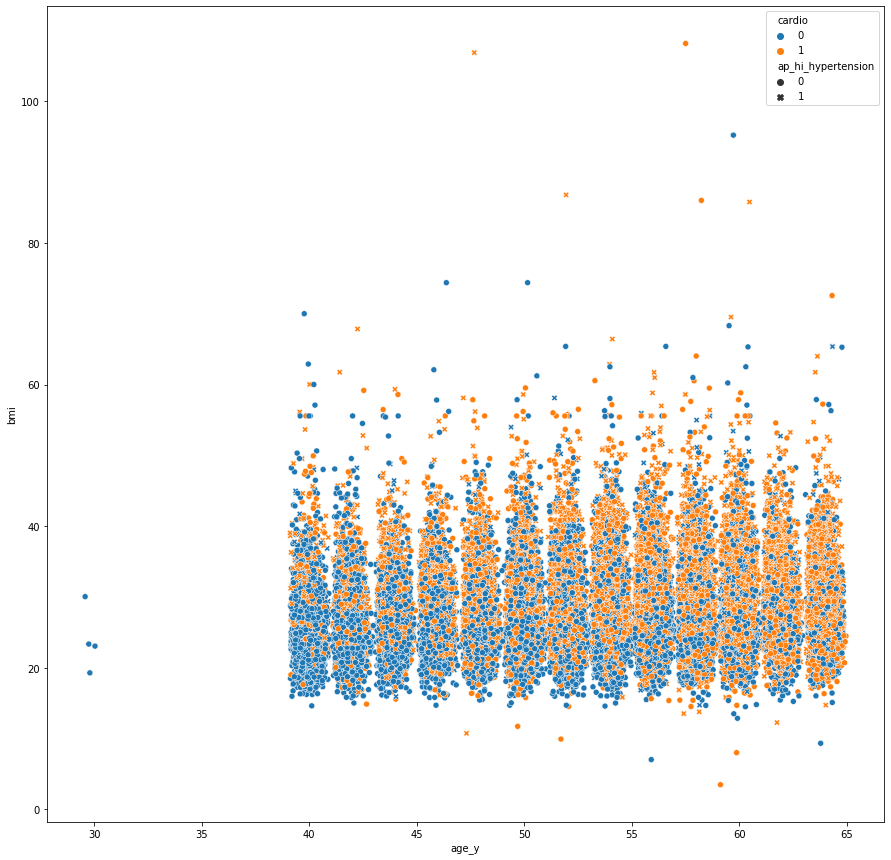

In [35]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='age_y', y='bmi', data= main_data, hue='cardio', style='ap_hi_hypertension')

In [36]:
#correlation matrix 
# correlation heatmap
corr = main_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
id,1.000000,0.003754,0.002887,-0.003226,-0.002019,0.000820,-0.001031,0.005848,0.002127,-0.003255,0.000603,0.003812,0.003756,0.003754,-0.000891,0.002453,0.002887,-0.006399,0.004267,0.000830,0.000224,0.000152,-0.000370
age,0.003754,1.000000,-0.023251,-0.084251,0.054807,0.209126,0.153888,0.155335,0.099040,-0.047832,-0.028973,-0.010430,0.239389,1.000000,0.100693,0.081718,-0.023251,-0.186019,0.011055,0.151087,-0.144617,0.006293,0.122571
gender,0.002887,-0.023251,1.000000,0.510902,0.156759,0.060779,0.067829,-0.036598,-0.020994,0.338885,0.171446,0.005671,0.007166,-0.023252,-0.108707,-0.110239,1.000000,-0.078171,0.035085,0.029284,-0.066091,0.018597,0.038549
height,-0.003226,-0.084251,0.510902,1.000000,0.304153,0.018771,0.037124,-0.052754,-0.020224,0.193199,0.097744,-0.009336,-0.011813,-0.084251,-0.223091,-0.186768,0.510902,-0.079000,0.076475,-0.016502,-0.065255,0.056818,-0.004667
weight,-0.002019,0.054807,0.156759,0.304153,1.000000,0.269348,0.250431,0.140791,0.106980,0.066751,0.067898,-0.017739,0.179895,0.054804,0.852274,0.676248,0.156759,-0.183341,-0.043393,0.209921,-0.174650,-0.050323,0.212381
ap_hi,0.000820,0.209126,0.060779,0.018771,0.269348,1.000000,0.706227,0.193433,0.092730,0.027565,0.033127,-0.000997,0.427660,0.209124,0.262307,0.217475,0.060779,-0.587193,-0.262910,0.811600,-0.445727,-0.211561,0.634389
ap_lo,-0.001031,0.153888,0.067829,0.037124,0.250431,0.706227,1.000000,0.159280,0.075262,0.026003,0.040753,0.000112,0.337568,0.153886,0.233918,0.190526,0.067829,-0.500231,-0.120390,0.574996,-0.699860,-0.133316,0.775131
cholesterol,0.005848,0.155335,-0.036598,-0.052754,0.140791,0.193433,0.159280,1.000000,0.450990,0.010082,0.035495,0.008929,0.221461,0.155337,0.168029,0.154617,-0.036598,-0.089945,-0.093969,0.184664,-0.086674,-0.081702,0.168429
gluc,0.002127,0.099040,-0.020994,-0.020224,0.106980,0.092730,0.075262,0.450990,1.000000,-0.005630,0.010784,-0.007703,0.089933,0.099041,0.117532,0.107219,-0.020994,-0.053859,-0.029786,0.080815,-0.046797,-0.024881,0.069570
smoke,-0.003255,-0.047832,0.338885,0.193199,0.066751,0.027565,0.026003,0.010082,-0.005630,1.000000,0.340355,0.025293,-0.016363,-0.047832,-0.033908,-0.029479,0.338885,-0.010626,-0.010190,0.020792,-0.010822,-0.014764,0.026099


############# FORMULATION OF HYPOTHESIS ###########################

Modelling techniques used:

 
The models that are tobe employed for the furhter analysis would be the models that can predict binary dependent models like:
 
1.   **Logistic regression model * - typical method used when the dependent variable is binary.
2.   **Artificial Neural Network - MLPClassifier** - Artificial Neural Networks are particularly suited to solve type of linearly inseparable classification problems.
The division between the different classes are determined in an iterative process. The trained neural network can be evaluated using a test set of the data. The validation results will be saved in the validation_results dictionary with the keys: Average accuracy, a Kappa for each predicted class, an average kappa and a rapport including precision, recall, f1-score and support.
3. **Decision Tree ** - The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a dataset with two inputs (x) of height in centimeters and weight in kilograms the output of sex as male or female, below is a crude example of a binary decision tree (completely fictitious for demonstration purposes only).
4. **Cluster Analysis**